# Equipo: 3
# Grupo: 002, Miércoles
## Integrantes: 
- 1941502 Vidal Mosqueda Cristina
- 1811901 García Salazar Orlando
- 1644680 Macías Cortés Isaí Adriel
- 1849522 Mora Martínez Gerardo


# ***Quejas Financieras de USA***

- **Url:** https://www.kaggle.com/cfpb/us-consumer-finance-complaints

## Introducción: 
Los servicios bancarios suelen presentar fallas, por lo que a consecuencia de esto, los clientes presentan quejas hacia los bancos. Nuestra base de datos se basa en las quejas que presentan los consumidores a los bancos estadounidenses.

## Descripción de los datos: 
Son reclamos hechos por los clientes, las cuales, son registradas por la CFPB (Consumer Financial Protection Bureau) que se introducen a una base de datos, generando una matriz de todas las quejas financieras que se hicieron en Estados Unidos de América.

## Descripción de la base de datos:
- De nuestra limpieza de la base de datos, las columnas que la conforma son: 
    - **date_received:** Fecha en la que la queja fue enviada por el cliente.
        - (**Tipo de dato:** Fecha en forma de cadena de texto).
    - **product:** El producto financiero referente a la queja que solicitó el cliente.
        - (**Tipo de dato:** Cadena de texto).
    - **issue:** El título general establecido para identificar la queja del cliente.
        - (**Tipo de dato:** Cadena de texto).
    - **company:** El banco en el que el cliente solicitó el servicio.
        - (**Tipo de dato:** Cadena de texto).
    - **state:** Estado en el que esta localizado el banco.
        - (**Tipo de dato:** Cadena de texto).
    - **submitted_via:** Medio por el cual la queja fue enviada.
        - (**Tipo de dato:** Cadena de texto).
    - **date_sent_to_company:** Fecha en la que se recibió al banco el reclamo del cliente.
        - (**Tipo de dato:** Fecha en forma de cadena de texto).
    - **company_response_to_consumer:** Respuesta del banco hacia el consumidor.
        - (**Tipo de dato:** Cadena de texto).
    - **timely_response:** Especifica si la queja fue contestada en el tiempo establecido del banco.
        - (**Tipo de dato:** Cadena de texto).
    - **consumer_disputed:** Especifica si el cliente quedó insatisfecho con la solución.
        - (**Tipo de dato:** Cadena de texto).
- El tamaño de la base de datos original es de 18 columnas con 555,957 filas/registros de quejas.

## Justificación del uso de datos:
Nos llamó la atención los tipos de quejas y los productos financieros a los que se estaban refiriendo.Creemos que con estos datos podemos identificar el mejor estado con mayor sastifacción al cliente respecto al resultado de su queja.

## Objetivos Principales:
- Encontrar los 5 bancos más grandes de USA.
- Encontrar el o los estados con mayor quejas en los bancos más grandes de USA.
- Del o de los estados con mayores quejas, encontrar dentro de los 5 bancos más grandes de Estados Unidos, cuál tendrá mayor predicción de clientes satisfechos dentro de 6 meses.

## Objetivos Secundarios:
- Encontrar los estados con mayor y menor cantidad de quejas.
- Encontrar los estados con mayor clientes insatisfechos.

# Desarrollo de las herramientas
- Mostraremos la base datos sin manipulacion (los primeros 5 registros dado su gran cantidad de filas).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Lectura de archivo
df = pd.read_csv("consumer_complaints.csv",encoding='utf8')
df.head()

C:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


- Eliminaremos las columnas no deseadas para nuestro estudio:
    - **sub_product:** No nos llama la atención el sub producto de los productos financieros.
    - **sub_issue:** No nos interesa la sub queja de la queja del cliente.
    - **consumer_complaint_narrative:** La descripción de la queja de cada cliente de la base de datos no nos proporciona información relevante para el estudio, más que la razón de la originación de la queja.
    - **company_public_response:** Esta columna no forma parte de nuestro estudio
    - **zipcode:** El código postal no proporciona información que nos ayude a nuestro estudio.
    - **tags:** Esta columna no da relevancia a nuestro estudio
    - **consumer_consent_provided:** No es de nuestro interés saber si el cliente recibió consentimiento
    - **complaint_id:** El ID de queja no es relevante para la investigación.

- Y cambiaremos los nombres de las columnas para su mejor entendimiento:

In [6]:
#Columnas innecesarias
aux = df.drop(['sub_product','sub_issue','consumer_complaint_narrative','company_public_response','zipcode','tags','consumer_consent_provided','complaint_id'],axis = 1)

#Cambiamos los nombres de las columnas para mayor entendimiento de la base de datos
aux = aux.rename(columns = {'date_received':'Fecha_Enviada_por_el_Cliente'})
aux = aux.rename(columns = {'product':'Producto_Financiero'})
aux = aux.rename(columns = {'issue':'Queja'})
aux = aux.rename(columns = {'company':'Banco'})
aux = aux.rename(columns = {'state':'Diminutivo_de_Estado_de_USA'})
aux = aux.rename(columns = {'submitted_via':'Medio_de_Envío'})
aux = aux.rename(columns = {'date_sent_to_company':'Fecha_Recibida_al_Banco'})
aux = aux.rename(columns = {'company_response_to_consumer':'Formato respuesta al cliente'})
aux = aux.rename(columns = {'timely_response':'¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?'})
aux = aux.rename(columns = {'consumer_disputed?':'¿Cliente_insastifecho_a_la_solución?'})

aux.head()

,Fecha_Enviada_por_el_Cliente,Producto_Financiero,Queja,Banco,Diminutivo_de_Estado_de_USA,Medio_de_Envío,Fecha_Recibida_al_Banco,Formato respuesta al cliente,¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?,¿Cliente_insastifecho_a_la_solución?
0,08/30/2013,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,Referral,09/03/2013,Closed with explanation,Yes,Yes
1,08/30/2013,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,Referral,09/03/2013,Closed with explanation,Yes,Yes
2,08/30/2013,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,Postal mail,09/18/2013,Closed with explanation,Yes,No
3,08/30/2013,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,Email,08/30/2013,Closed with explanation,Yes,Yes
4,08/30/2013,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,Web,08/30/2013,Closed with explanation,Yes,Yes


- Verificamos si hay datos nulos en nuestra base de datos:

In [7]:
aux.isnull().any()

Fecha_Enviada_por_el_Cliente                     False
Producto_Financiero                              False
Queja                                            False
Banco                                            False
Diminutivo_de_Estado_de_USA                       True
Medio_de_Envío                                   False
Fecha_Recibida_al_Banco                          False
Formato respuesta al cliente                     False
¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?    False
¿Cliente_insastifecho_a_la_solución?             False
dtype: bool

- Analizando el resultado anterior, podemos apreciar que la columna de los estados muestran datos nulos, por lo que tendremos que quitar aquellas filas con este dato nulo para obtener una base de datos limpia.

In [12]:
#Quitamos las filas con nulos
baselimp = aux.dropna()

#Tamaño de la base final
baselimp.shape

(551070, 10)

- Al haber quitado las filas que contenían nulos, siendo estos una cantidad de 4,887 registros, los cuales representan 0.87% del total de los registros de nuestra base de datos, por lo que no genera cambios significativos en el análisis. Ya dada las modificaciones, procedemos a pasar la base de datos a un nuevo archivo.

In [9]:
#Exportamos base a csv
baselimp.to_csv('Base_Limpia_Quejas_Financieras.csv', index = False)
#Hacemos la lectura de la nueva base
nudf = pd.read_csv("Base_Limpia_Quejas_Financieras.csv",encoding='utf8')

# Estadística Básica

- Con nuestra nueva base de datos, procederemos a realizar estadísticos para analizar los datos. Los estadísticos a utilizar es el máximo y el mínimo (que nos proporciona aquél producto financiero con mayores/menores quejas). Usaremos el comando "describe()", para checar el tiempo entre la fecha que se envió la queja del cliente hasta la fecha en la cual el banco recibió la queja, considerando que la respuesta del banco al cliente se proporciona en el mismo día de llegada, por lo que se tuvo que agregar otra columna para obtener este dato, y ya con esto, hacer un análisis de de estos resultados.

In [10]:
from collections import Counter
import operator as op
ps = Counter(nudf['Producto_Financiero'])
pi = dict(ps)

maxi= max(pi.items(),key = op.itemgetter(1))
mini=min(pi.items(),key = op.itemgetter(1))

print("Máximo: %s\nMínimo: %s" % (maxi,mini))

Máximo: ('Mortgage', 185187)
Mínimo: ('Other financial service', 542)


- El producto con mayor quejas en USA fue la hipoteca, con una cantidad de 185,187 (esta cantidad representa 33.6% de todas las quejas); y el producto financiero con menor quejas fue el de "Otros servicios financieros", con un total de 542 quejas (0.0009% de las quejas totales).

In [11]:
from datetime import datetime, timedelta
#Se corre una vez estas 2 líneas para convertir de tipo objeto a fecha
nudf['Fecha_Recibida_al_Banco'] = nudf['Fecha_Recibida_al_Banco'].apply(lambda _ : datetime.strptime(_,"%m/%d/%Y"))
nudf['Fecha_Enviada_por_el_Cliente'] = nudf['Fecha_Enviada_por_el_Cliente'].apply(lambda _ : datetime.strptime(_,"%m/%d/%Y"))

nudf['Diferencia de Tiempo'] = nudf['Fecha_Recibida_al_Banco'].sub(nudf['Fecha_Enviada_por_el_Cliente'], axis=0)
nudf['Diferencia de Tiempo'] = nudf['Diferencia de Tiempo'] / np.timedelta64(1, 'D') 

In [13]:
print(nudf['Diferencia de Tiempo'].describe())
print("Sesgo:",nudf['Diferencia de Tiempo'].skew())
print("Curtosis:",nudf['Diferencia de Tiempo'].kurt())

count    551070.000000
mean          4.647010
std          17.184817
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Diferencia de Tiempo, dtype: float64
Sesgo: 13.05546257077172
Curtosis: 271.2226636524076


- Observando el resultado anterior, nos damos cuenta que el mínimo de la diferencia de tiempo es -1, este resultado es irreal, por lo que la base de datos presenta errores tanto en la fecha de envío de la que queja por el cliente y la fecha recibida al banco, por lo que procederemos a contabilizar los "-1" para removerlos de la base. 

In [14]:
d=nudf[nudf['Diferencia de Tiempo'] == -1].count()
print("Cantidad de diferencias de tiempo igual a -1: %d" % (d[1]))

Cantidad de diferencias de tiempo igual a -1: 7042


- Se contabilizan 7,042 registros, lo consideramos datos no significativos de la base de datos.

In [15]:
nudf = nudf.drop(nudf[nudf['Diferencia de Tiempo']==-1].index)
nudf.shape

(544028, 11)

- Una vez ya eliminado estos registros, procedemos a volver a imprimir:

In [16]:
print(nudf['Diferencia de Tiempo'].describe())
print("Sesgo:",nudf['Diferencia de Tiempo'].skew())
print("Curtosis:",nudf['Diferencia de Tiempo'].kurt())

count    544028.000000
mean          4.720106
std          17.283590
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Diferencia de Tiempo, dtype: float64
Sesgo: 12.986786257051588
Curtosis: 268.25688478230666


- La media de tiempo de respuesta de clientes de USA es de 4.72 días, con una desviación estándar del 17.28 días, esto marca la variabilidad que puede tener la respuesta del banco al cliente; la mediana del tiempo de respuesta es de 4 días y el tiempo máximo de respuesta al cliente es de 993 días (este dato puede ser atípico); El sesgo nos indica que el tiempo de respuesta tiene una asimetría positiva, es decir, la distancia al promedio en el primer cuartil es menor que la del tercer cuartil y la curtosis nos indica que la mayor parte de los datos está alrededor de la media.

# Gráficas

- Explicaremos el porqué no se puede graficar las siguientes variables de la base:
    - **Queja:** Columna de comentarios individuales de los clientes
    - **Banco:** Se puede graficar, pero hay 3,605 bancos, por lo que es complicado realizar una visualización de la cantidad de quejas por banco
    - **Fecha_Recibida_al_Banco:** Columna de Fechas
- Ahora haremos unas gráficas para analizar mejor nuestros registros de la base de datos.

Text(-8.699999999999996, 0.5, 'Número de quejas')

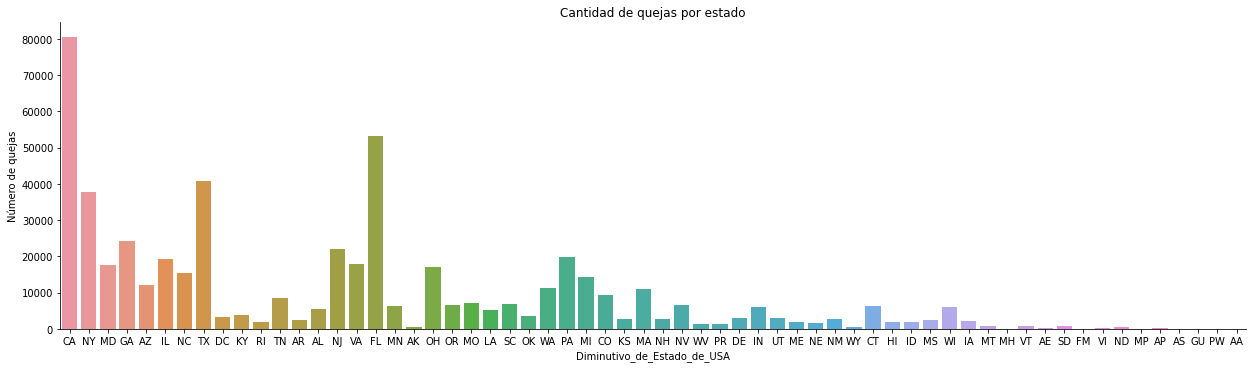

In [17]:
sns.catplot(x="Diminutivo_de_Estado_de_USA", kind="count", data=nudf, aspect= 3.5)
plt.title("Cantidad de quejas por estado")
plt.ylabel("Número de quejas")

- Para una mayor visualización de aquellos estados con menor quejas:

In [18]:
#Creamos una lista de quejas por estado y las ordenamos de menor a mayor
listasum1,listaname1=[],[]
tipo1=nudf['Diminutivo_de_Estado_de_USA'].unique().tolist()
s=len(tipo1)
for i in range(s):
    a=nudf[nudf["Diminutivo_de_Estado_de_USA"]==tipo1[i]].count()[1]
    listasum1.append(a)
    listaname1.append(tipo1[i])

tabla1 = {'Nombre': listaname1,'Número de quejas' : listasum1}
tabla1 = pd.DataFrame(tabla1, columns = ['Nombre','Número de quejas'])
tabla1.sort_values(by="Número de quejas",ascending=True)

,Nombre,Número de quejas
61,AA,9
60,PW,9
58,AS,17
56,MP,19
49,MH,27
...,...,...
3,GA,24275
1,NY,37826
7,TX,40798
16,FL,53155


- Investigando los diminutivos de los estados provenientes de USA fuera de nuestro estudio, nos damos que hay territorios no incorporados o no son considerados estados de USA, por lo que procederemos a eliminar estos diminutivos.

In [20]:
#Base de datos
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="AA"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="PW"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="AS"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="MP"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="MH"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="FM"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="GU"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="VI"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="AP"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="AE"].index)


#Tabla creada
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="AA"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="PW"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="AS"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="MP"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="MH"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="FM"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="GU"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="VI"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="AP"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="AE"].index)
tabla1.sort_values(by="Número de quejas",ascending=True).head(5)

,Nombre,Número de quejas
55,ND,467
41,WY,538
18,AK,630
52,SD,742
48,MT,882


- Los mejores bancos con menores quejas de Noviembre 2011 a Abril 2016 son ND (Dakota del Norte) con 467 quejas, WY (Wyoming) 538 quejas y AK (Alaska) 630 quejas. Entonces la gráfica quedaría así:

Text(-8.699999999999996, 0.5, 'Número de quejas')

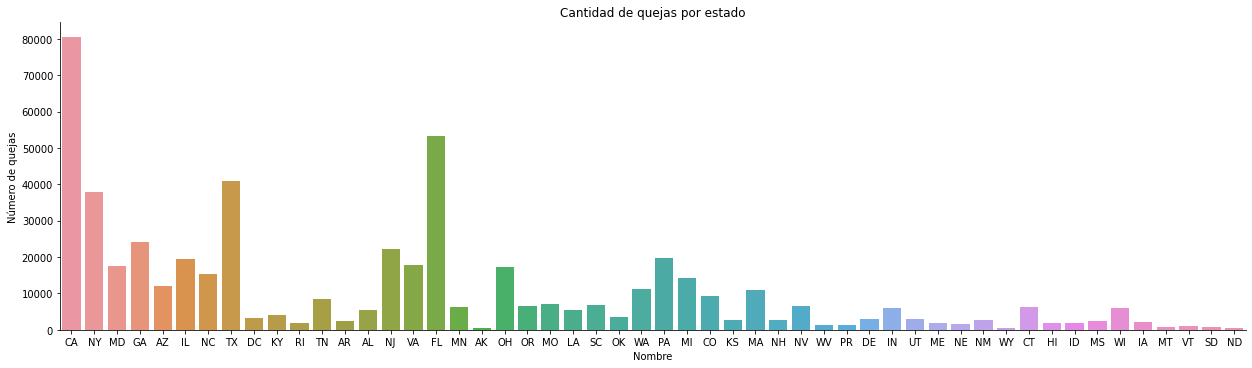

In [21]:
sns.catplot(y="Número de quejas", x= "Nombre", kind="bar", data=tabla1, aspect= 3.5)
plt.title("Cantidad de quejas por estado")
plt.ylabel("Número de quejas")

- El estado con mayor quejas fue California, despúes Florida y Texas.

<AxesSubplot:xlabel='Fecha_Enviada_por_el_Cliente', ylabel='Density'>

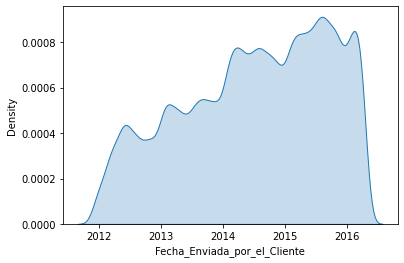

In [22]:
sns.kdeplot(data=nudf['Fecha_Enviada_por_el_Cliente'], shade=True)

- De la gráfica anterior, podemos visualizar que las quejas enviadas por los clientes han ido aumentando conforme pasa el tiempo (a partir del año del 2016 baja dada la poca cantidad de datos de ese periodo).

Text(1448.175, 0.5, 'Número de quejas')

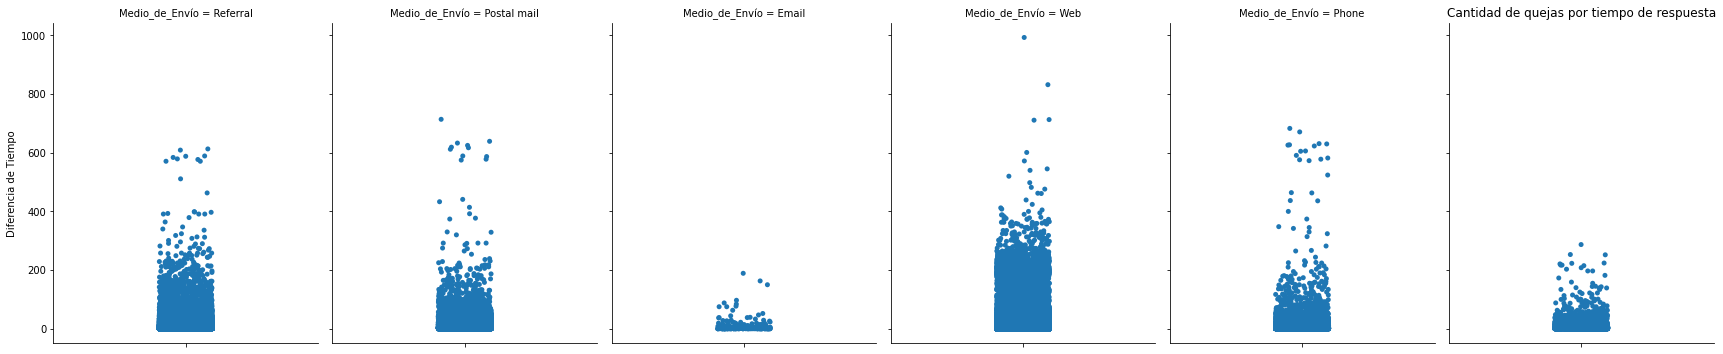

In [23]:
sns.catplot(y= "Diferencia de Tiempo", kind="strip", data=nudf, aspect= 0.8, col = "Medio_de_Envío")
plt.title("Cantidad de quejas por tiempo de respuesta")
plt.ylabel("Número de quejas")

- El dato atípico supuesto en la sección de *"Estadística Básica"*,fue enviada por la web y las quejas con más longitud de tiempo de respuesta es por web, mientras que la menor es por email.

Text(30.345190972222213, 0.5, 'Número de quejas')

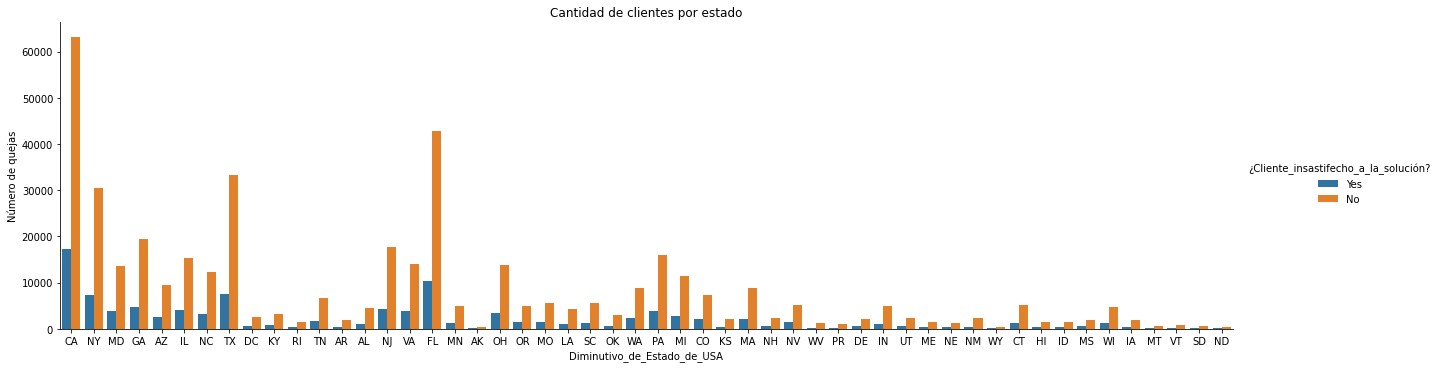

In [24]:
sns.catplot(x= "Diminutivo_de_Estado_de_USA", kind="count", data=nudf, aspect= 3.5, hue= "¿Cliente_insastifecho_a_la_solución?")
plt.title("Cantidad de clientes por estado")
plt.ylabel("Número de quejas")

- Los estados con mayor satisfacción al cliente son California (CA), Florida (FL), Texas (TX) y New York (NY).(Barras Naranjas)

## Conclusión de la Sección *"Gráficas"*
Encontramos que, con el análisis de los resultados de las gráficas, los estados de mayor número de quejas (California, Florida Texas), también tiene la mayor cantidad de clientes satisfechos con la solución de su queja; Al ver la gráfica de la densidad, notamos que las quejas han ido aumentando gradualmente, y llega a su punto máximo a mediados del 2015 y de ahí se va reduciendo gradualmente (sabiendo que a partir del 2016 no hay más registros dado que es el límite de la base de datos); El tipo de envío, tanto web, como expediente de remisión, tienen casi el mismo tiempo máximo de respuesta, a pesar de las diferentes cantidades de cada una, por lo que realizar una queja por la web que presencialmente en el banco toma casi el mismo tiempo (considerando los datos concentrados de la gráfica strip). A pesar de que hicimos limpieza al principio de nuestro estudio, no considerabamos que al utilizar los datos para realizar los estadísticos descriptivas y analíticos, obtener datos incongruentes como lo fue el tiempo de respuesta y los diminutivos que no son considerados estados. Por lo que pudimos responder los objetivos secundarios, propuestos al principio del estudio.

# Técnicas de Minería
- En este estudio, emplearemos la técnica de Regresión Lineal Simple, donde podremos responder uno de los objetivos principales; Ésta técnica de minería, nos porprocionará información para estimar resultados futuros usando los datos históricos de nuestra base de datos modificada. También emplearemos la técnica de visualización para responder otro objetivos¿ principal, ya que organizando la información con esta técnica, nos dará las respuestas buscadas. El último objetivo se obtendrá realizando una investigación fuera del estudio. Empezaremos por encontrar los 5 bancos más grandes de USA:

In [27]:
Jpmorgan = nudf.drop(nudf[nudf['Banco']!='JPMorgan Chase & Co.'].index)
Banka = nudf.drop(nudf[nudf['Banco']!='Bank of America'].index)
Wells = nudf.drop(nudf[nudf['Banco']!='Wells Fargo & Company'].index)
Citi = nudf.drop(nudf[nudf['Banco']!='Citibank'].index)
Bancorp = nudf.drop(nudf[nudf['Banco']!='U.S. Bancorp'].index)

Jpmorgan=Jpmorgan.groupby(['Diminutivo_de_Estado_de_USA']).count()
Jpmorgan=Jpmorgan.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','Formato respuesta al cliente','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?','Diferencia de Tiempo'],axis = 1)

Banka=Banka.groupby(['Diminutivo_de_Estado_de_USA']).count()
Banka=Banka.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','Formato respuesta al cliente','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?','Diferencia de Tiempo'],axis = 1)

Wells=Wells.groupby(['Diminutivo_de_Estado_de_USA']).count()
Wells=Wells.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','Formato respuesta al cliente','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?','Diferencia de Tiempo'],axis = 1)

Citi=Citi.groupby(['Diminutivo_de_Estado_de_USA']).count()
Citi=Citi.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','Formato respuesta al cliente','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?','Diferencia de Tiempo'],axis = 1)

Bancorp=Bancorp.groupby(['Diminutivo_de_Estado_de_USA']).count()
Bancorp=Bancorp.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','Formato respuesta al cliente','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?','Diferencia de Tiempo'],axis = 1)

- Generamos 5 bases, 1 por banco, para realizar nuestros análisis y se agruparon por estado para contabilizar la cantidad de quejas, y de ahí eliminamos las columnas restantes para quedarnos con las siguientes respuestas:

In [28]:
Jpmorgan.sort_values(by="Producto_Financiero",ascending=False).head(1)

,Producto_Financiero
Diminutivo_de_Estado_de_USA,
CA,5952


In [29]:
Banka.sort_values(by="Producto_Financiero",ascending=False).head(1)

,Producto_Financiero
Diminutivo_de_Estado_de_USA,
CA,10650


In [30]:
Wells.sort_values(by="Producto_Financiero",ascending=False).head(1)

,Producto_Financiero
Diminutivo_de_Estado_de_USA,
CA,7994


In [31]:
Citi.sort_values(by="Producto_Financiero",ascending=False).head(1)

,Producto_Financiero
Diminutivo_de_Estado_de_USA,
CA,3628


In [32]:
Bancorp.sort_values(by="Producto_Financiero",ascending=False).head(1)

,Producto_Financiero
Diminutivo_de_Estado_de_USA,
CA,1674


- De los resultados anteriores, California (CA) es el estado con mayor quejas en cada uno de los 5 bancos más grandes de USA. Ahora, crearemos otras 5 bases de datos para realizar las predicciones de clientes satisfechos con la técnica de Regresión Lineal Simple en el estado de California; después haremos las respectivas agrupaciones y eliminaremos las columnas restantes para quedarnos con la cantidad de quejas por banco en California por mes:

In [38]:
#Obtenemos las bases por el estado de California, Clientes satisfechos y por banco
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']!="CA"].index)
nudf = nudf.drop(nudf[nudf['¿Cliente_insastifecho_a_la_solución?']!="No"].index)

Jpmorgan1 = nudf.drop(nudf[nudf['Banco']!='JPMorgan Chase & Co.'].index)
Banka1 = nudf.drop(nudf[nudf['Banco']!='Bank of America'].index)
Wells1 = nudf.drop(nudf[nudf['Banco']!='Wells Fargo & Company'].index)
Citi1 = nudf.drop(nudf[nudf['Banco']!='Citibank'].index)
Bancorp1 = nudf.drop(nudf[nudf['Banco']!='U.S. Bancorp'].index)

Jpmorgan1=Jpmorgan1.groupby(Jpmorgan1['Fecha_Recibida_al_Banco'].dt.strftime("%Y %m")).count()
Jpmorgan1=Jpmorgan1.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','Formato respuesta al cliente','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?','Diminutivo_de_Estado_de_USA','Diferencia de Tiempo'],axis = 1)

Banka1=Banka1.groupby(Banka1['Fecha_Recibida_al_Banco'].dt.strftime("%Y %m")).count()
Banka1=Banka1.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','Formato respuesta al cliente','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?','Diminutivo_de_Estado_de_USA','Diferencia de Tiempo'],axis = 1)

Wells1=Wells1.groupby(Wells1['Fecha_Recibida_al_Banco'].dt.strftime("%Y %m")).count()
Wells1=Wells1.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','Formato respuesta al cliente','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?','Diminutivo_de_Estado_de_USA','Diferencia de Tiempo'],axis = 1)

Citi1=Citi1.groupby(Citi1['Fecha_Recibida_al_Banco'].dt.strftime("%Y %m")).count()
Citi1=Citi1.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','Formato respuesta al cliente','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?','Diminutivo_de_Estado_de_USA','Diferencia de Tiempo'],axis = 1)

Bancorp1=Bancorp1.groupby(Bancorp1['Fecha_Recibida_al_Banco'].dt.strftime("%Y %m")).count()
Bancorp1=Bancorp1.drop(['Fecha_Enviada_por_el_Cliente','Queja','Banco','Medio_de_Envío','Fecha_Recibida_al_Banco','Formato respuesta al cliente','¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?','¿Cliente_insastifecho_a_la_solución?','Diminutivo_de_Estado_de_USA','Diferencia de Tiempo'],axis = 1)

- Luego, agregamos una columna para enumerar las quejas por mes por banco, ya que la columna que proporciona la función de *groupby()* es una referencia de visualización, no forma parte de la base de datos.

In [71]:
num=[]
for i in range(1,54):
    num.append(i)

Jpmorgan1=Jpmorgan1.assign(Numeros=num)
Banka1=Banka1.assign(Numeros=num)
Wells1=Wells1.assign(Numeros=num)
Citi1=Citi1.assign(Numeros=num)
Bancorp1=Bancorp1.assign(Numeros=num)

- Y con estas modificaciones, ya podemos usar la técnica de Regresión Lineal Simple:

In [42]:
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return(vif)

# ***JPMorgan Chase & Co.***

In [46]:
#Fit model
y=Jpmorgan1['Producto_Financiero']
x=Jpmorgan1['Numeros']
d = {"x": x}
X=pd.DataFrame(d)
model1=build_model(X,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.019
Method:                  Least Squares   F-statistic:                   0.02266
Date:                 Tue, 19 Oct 2021   Prob (F-statistic):              0.881
Time:                         01:59:56   Log-Likelihood:                -233.70
No. Observations:                   53   AIC:                             471.4
Df Residuals:                       51   BIC:                             475.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.5515      5.651     15.13

- Tiene un ajuste R cuadrado de 0, por lo que el ajuste de los datos al modelo lineal es muy deficiente, por lo que graficar este modelo da como resultado la recta estimada rodeada de valores dispersos.

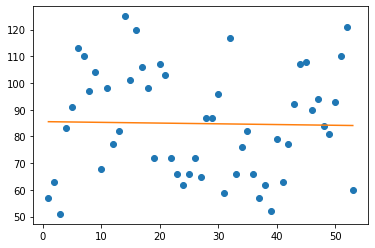

In [47]:
plt.plot(x, y, 'o')
a, b= np.polyfit(x, y, 1)
plt.plot(x, a*x + b)

- Procedemos a realizar el modelo lineal cuadrático.

In [49]:
x_2=Jpmorgan1['Producto_Financiero']**2
d2 = {"x":x, "x_2":x_2}
X_2=pd.DataFrame(d2)
mod3=build_model(X_2,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.988
Model:                             OLS   Adj. R-squared:                  0.988
Method:                  Least Squares   F-statistic:                     2107.
Date:                 Tue, 19 Oct 2021   Prob (F-statistic):           5.36e-49
Time:                         02:02:26   Log-Likelihood:                -115.89
No. Observations:                   53   AIC:                             237.8
Df Residuals:                       50   BIC:                             243.7
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.1599      0.922     44.64

- Hay un ajuste R cuadrado de 0.988, por lo que los datos tienen un buen ajuste al modelo cuadrático. El p-valor de esta regresión es de 5.36e-49, por lo que es menor a un nivel de significancia del 5% (p-valor < alpha), por lo que los datos se distribuyen de forma significativa.

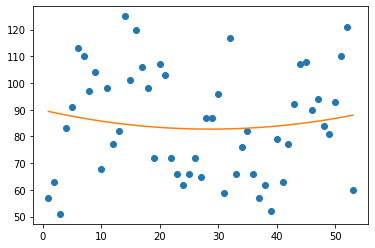

In [50]:
plt.plot(x, y, 'o')
a,b,c = np.polyfit(x, y, 2)
plt.plot(x, a*x*x +b*x + c)

- **Nota:** Consideramos que las escalas no son las adecuadas para visualizar el ajuste.

- Procedemos a realizar la predicción:

In [51]:
X_2=sm.add_constant(X_2)
y_pred = sm.OLS(y,X_2).fit().predict([1,60,60**2]) #lo que está dentro del arreglo es lo que multiplica a las betas, incluyendo B0
y_pred

array([62.42522656])

# ***Bank of America***

In [52]:
#Fit model
y=Banka1['Producto_Financiero']
x=Banka1['Numeros']
d = {"x": x}
X=pd.DataFrame(d)
model1=build_model(X,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.357
Model:                             OLS   Adj. R-squared:                  0.344
Method:                  Least Squares   F-statistic:                     28.30
Date:                 Tue, 19 Oct 2021   Prob (F-statistic):           2.33e-06
Time:                         02:07:09   Log-Likelihood:                -280.68
No. Observations:                   53   AIC:                             565.4
Df Residuals:                       51   BIC:                             569.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        217.6190     13.712     15.87

- Tiene un ajuste R cuadrado de 0.357, por lo que el ajuste de los datos al modelo lineal es deficiente, por lo que graficar este modelo da como resultado la recta estimada rodeada de valores dispersos.

- Procedemos a realizar el modelo lineal cuadrático.

In [54]:
x_2=Banka1['Producto_Financiero']**2
d2 = {"x":x, "x_2":x_2}
X_2=pd.DataFrame(d2)
mod3=build_model(X_2,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.966
Model:                             OLS   Adj. R-squared:                  0.965
Method:                  Least Squares   F-statistic:                     716.4
Date:                 Tue, 19 Oct 2021   Prob (F-statistic):           1.57e-37
Time:                         02:09:57   Log-Likelihood:                -202.55
No. Observations:                   53   AIC:                             411.1
Df Residuals:                       50   BIC:                             417.0
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.3209      5.237     17.62

- Hay un ajuste R cuadrado de 0.966, por lo que los datos tienen un buen ajuste al modelo cuadrático.El p-valor de esta regresión es de 1.57e-37, por lo que es menor a un nivel de significancia del 5% (p-valor < alpha), por lo que los datos se distribuyen de forma significativa.

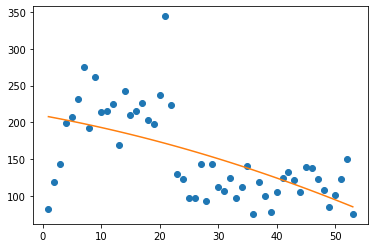

In [55]:
plt.plot(x, y, 'o')
a,b,c = np.polyfit(x, y, 2)
plt.plot(x, a*x*x +b*x + c)

- Procedemos a realizar la predicción:

In [56]:
X_2=sm.add_constant(X_2)
y_pred = sm.OLS(y,X_2).fit().predict([1,60,60**2]) #lo que está dentro del arreglo es lo que multiplica a las betas, incluyendo B0
y_pred

array([83.34968787])

# ***Wells Fargo & Company***

In [58]:
#Fit model
y=Wells1['Producto_Financiero']
x=Wells1['Numeros']
d = {"x": x}
X=pd.DataFrame(d)
model1=build_model(X,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.018
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.9434
Date:                 Tue, 19 Oct 2021   Prob (F-statistic):              0.336
Time:                         02:13:28   Log-Likelihood:                -254.98
No. Observations:                   53   AIC:                             514.0
Df Residuals:                       51   BIC:                             517.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.7025      8.445     14.29

- Tiene un ajuste R cuadrado de 0.018, por lo que el ajuste de los datos al modelo lineal es muy deficiente, por lo que graficar este modelo da como resultado la recta estimada rodeada de valores dispersos.

- Procedemos a realizar el modelo lineal cuadrático.

In [60]:
x_2=Wells1['Producto_Financiero']**2
d2 = {"x":x, "x_2":x_2}
X_2=pd.DataFrame(d2)
mod3=build_model(X_2,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.953
Model:                             OLS   Adj. R-squared:                  0.951
Method:                  Least Squares   F-statistic:                     510.4
Date:                 Tue, 19 Oct 2021   Prob (F-statistic):           5.40e-34
Time:                         02:15:12   Log-Likelihood:                -174.27
No. Observations:                   53   AIC:                             354.5
Df Residuals:                       50   BIC:                             360.5
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.0127      2.883     17.69

- Hay un ajuste R cuadrado de 0.953, por lo que los datos tienen un buen ajuste al modelo cuadrático.El p-valor de esta regresión es de 5.40e-34, por lo que es menor a un nivel de significancia del 5% (p-valor < alpha), por lo que los datos se distribuyen de forma significativa.

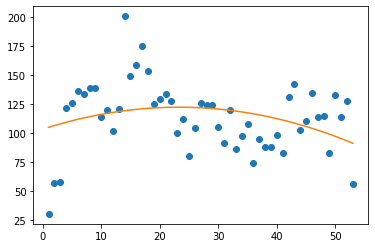

In [61]:
plt.plot(x, y, 'o')
a,b,c = np.polyfit(x, y, 2)
plt.plot(x, a*x*x +b*x + c)

- Procedemos a realizar la predicción:

In [62]:
X_2=sm.add_constant(X_2)
y_pred = sm.OLS(y,X_2).fit().predict([1,60,60**2]) #lo que está dentro del arreglo es lo que multiplica a las betas, incluyendo B0
y_pred

array([73.91417127])

# ***Citibank***

In [63]:
#Fit model
y=Citi1['Producto_Financiero']
x=Citi1['Numeros']
d = {"x": x}
X=pd.DataFrame(d)
model1=build_model(X,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.184
Model:                             OLS   Adj. R-squared:                  0.168
Method:                  Least Squares   F-statistic:                     11.49
Date:                 Tue, 19 Oct 2021   Prob (F-statistic):            0.00136
Time:                         02:18:03   Log-Likelihood:                -210.36
No. Observations:                   53   AIC:                             424.7
Df Residuals:                       51   BIC:                             428.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7620      3.638     11.47

- Tiene un ajuste R cuadrado de 0.184, por lo que el ajuste de los datos al modelo lineal es muy deficiente, por lo que graficar este modelo da como resultado la recta estimada rodeada de valores dispersos.

- Procedemos a realizar el modelo lineal cuadrático.

In [65]:
x_2=Citi1['Producto_Financiero']**2
d2 = {"x":x, "x_2":x_2}
X_2=pd.DataFrame(d2)
mod3=build_model(X_2,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.971
Model:                             OLS   Adj. R-squared:                  0.970
Method:                  Least Squares   F-statistic:                     837.1
Date:                 Tue, 19 Oct 2021   Prob (F-statistic):           3.62e-39
Time:                         02:19:17   Log-Likelihood:                -121.92
No. Observations:                   53   AIC:                             249.8
Df Residuals:                       50   BIC:                             255.7
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.8452      0.789     35.29

- Hay un ajuste R cuadrado de 0.971, por lo que los datos tienen un buen ajuste al modelo cuadrático.El p-valor de esta regresión es de 3.62e-39, por lo que es menor a un nivel de significancia del 5% (p-valor < alpha), por lo que los datos se distribuyen de forma significativa.

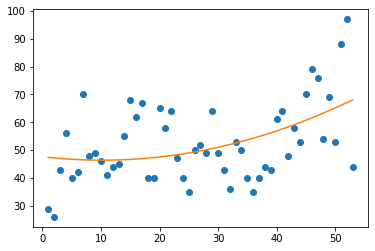

In [66]:
plt.plot(x, y, 'o')
a,b,c = np.polyfit(x, y, 2)
plt.plot(x, a*x*x +b*x + c)

- Procedemos a realizar la predicción:

In [67]:
X_2=sm.add_constant(X_2)
y_pred = sm.OLS(y,X_2).fit().predict([1,60,60**2]) #lo que está dentro del arreglo es lo que multiplica a las betas, incluyendo B0
y_pred

array([58.06247333])

# ***U.S. Bancorp***

In [73]:
#Fit model
y=Bancorp1['Producto_Financiero']
x=Bancorp1['Numeros']
d = {"x": x}
X=pd.DataFrame(d)
model1=build_model(X,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.373
Model:                             OLS   Adj. R-squared:                  0.361
Method:                  Least Squares   F-statistic:                     30.38
Date:                 Tue, 19 Oct 2021   Prob (F-statistic):           1.18e-06
Time:                         02:24:31   Log-Likelihood:                -178.96
No. Observations:                   53   AIC:                             361.9
Df Residuals:                       51   BIC:                             365.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7475      2.012      7.33

- Tiene un ajuste R cuadrado de 0.373, por lo que el ajuste de los datos al modelo lineal es deficiente, por lo que graficar este modelo da como resultado la recta estimada rodeada de valores dispersos.

- Procedemos a realizar el modelo lineal cuadrático.

In [75]:
x_2=Bancorp1['Producto_Financiero']**2
d2 = {"x":x, "x_2":x_2}
X_2=pd.DataFrame(d2)
mod3=build_model(X_2,y)

                             OLS Regression Results                            
Dep. Variable:     Producto_Financiero   R-squared:                       0.954
Model:                             OLS   Adj. R-squared:                  0.953
Method:                  Least Squares   F-statistic:                     524.0
Date:                 Tue, 19 Oct 2021   Prob (F-statistic):           2.88e-34
Time:                         02:25:31   Log-Likelihood:                -109.48
No. Observations:                   53   AIC:                             225.0
Df Residuals:                       50   BIC:                             230.9
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6443      0.571     18.63

- Hay un ajuste R cuadrado de 0.954, por lo que los datos tienen un buen ajuste al modelo cuadrático.El p-valor de esta regresión es de 2.88e-34, por lo que es menor a un nivel de significancia del 5% (p-valor < alpha), por lo que los datos se distribuyen de forma significativa.

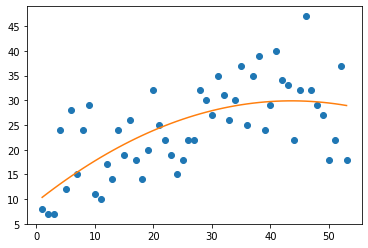

In [76]:
plt.plot(x, y, 'o')
a,b,c = np.polyfit(x, y, 2)
plt.plot(x, a*x*x +b*x + c)

- Procedemos a realizar la predicción:

In [77]:
X_2=sm.add_constant(X_2)
y_pred = sm.OLS(y,X_2).fit().predict([1,60,60**2]) #lo que está dentro del arreglo es lo que multiplica a las betas, incluyendo B0
y_pred

array([79.88390345])

# Conclusión

Haciendo ajustes y procedimientos a nuestra base de datos, la técnica de Regresión Lineal Simple nos ayudó analizar la tendencia de los clientes sastifechos en los 5 bancos más grandes de USA (los cuales se obtuvieron de una pequeña investigación fuera de nuestro estudio), y hacer nuestra predicción de la cantidad de clientes satisfechos dentro de 6 meses, los cuales fueron:

- **Citi Group:** 59 clientes
- **JP Morgan:** 63 clientes
- **Wells Fargo:** 74 clientes
- **US Bancorp:** 80 clientes
- **Bank of America:** 84 clientes

Por lo que el Banco "Bank of America" es el mejor con mayor estimación de clientes satisfechos. Y de estos bancos, el estado con mayor número de quejas fue California; Recordemos que en nuestro estudio anterior, California fue el estado con mayor quejas y mayor satisfacción al cliente.

Las métricas de evaluación usadas en esta técnica son el R cuadrada, ya que nos proporción el ajuste de los datos al modelo; también se usó el p-valor (*Prob (F-statistic)*) para determinar la significancia de los datos al modelo, y en este caso no se ocupó calcular el VIF, ya que la base de datos de cada banco solo cuenta con una sola variable, de caso contrario, si se hubiese necesitado.

- Como trabajo futuro, se puede emplear en la vida real, un app en la que se pueda actualizar la base de datos cada fin de año, para consultar que banco conviene escoger respecto a la cantidad de quejas, del estado de donde vive, y de la satisfacción del cliente de los productos financieros registrados en la base de datos que necesite el consumidor, para lograr a tomar una mejor decisión.